# ANCHORMEN ACADEMY
# EXCERCISES 1 - SOLUTIONS

## SECTION A


In [22]:
# loading libraries, some settings for plots

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("..")

In [23]:
# load the data
from pathlib import Path
datafolder = Path("../data/raw")
df = pd.read_csv(datafolder / "cancer_data_uncleaned.csv", index_col="id")

Explore the data. Think of functions like `describe` or `info`. Take a good look at the columns, and clean up things that are obviously weird or wrong. 

1. Are there NaN's? If you find complete columns or rows with NaN's, remove them.
2. Check for exceptional outliers, that are most likely a mistake. To do so, scale the data to compare things in one boxplot, and after scaling check for the biggest outlier. If you find observations that are obviously an error, remove the complete row. Check your result visually, eg with boxplots or a pairplot.

What is the immpact of huge outliers on scaling? For your final dataset, would
you want to apply scaling before, or after removing outliers?


This is a check. If it passes, you are done preprocessing

In [33]:
assert np.floor(np.sum(np.sum(X)) + np.sum(X.shape)) == 598.0

# Excercise
The preprocessing we have done so far is very senstive to errors. Now move all
the steps into a function, where the input is the path of the dataset and the
output is the cleaned and scaled dataset.

- Add a path for the output file (the `data/processed` folder) and also save the
file there. 
- Check for the existence of the preprocessed file with
  `outputfile.exists()`, which is a method for all Path objects from pathlib. If
  the file exists, skip the preprocessing and just load from disk.
- generalize the dropping of a column, such that you can provide a list of
  strings. If the columns exist, they will be dropped. If not, there should be
  no error.
- Drop the row with texture_mean as 9999. 
- add a logger for the steps in the process. 


````
def preprocess_cancer(datafile : Path, outputfile: Path) -> pd.DataFrame:
    ...
    return df
````


Clean up the weird things, split into $X$ and $y$, scale the data.
Check your result visually, eg with boxplots or a pairplot.

In [34]:
from src.data import  make_dataset
from typing import List, Tuple
from loguru import logger


def preprocess_cancer(
    datafile: Path,
    outputfile: Path,
    targetcol: str = "diagnosis",
    to_drop: List[str] = ["Unnamed: 32"]
) -> Tuple[np.ndarray, np.ndarray, List[str]]:
    """Preprocess data

    Args:
        datafile (Path): Path to raw datafile
        outputfile (Path): Outputpath for preprocessed data
        targetcol (str, optional): Targetcolumn. Defaults to "diagnosis".
        to_drop (List[str], optional): Columns to remove from raw data.
           Will check if the columns exist. Defaults to ["Unnamed: 32"].

    Returns:
        Tuple[np.ndarray, np.ndarray, List[str]]: Returns X, y and labels
    """
    if not outputfile.exists():
        raise NotImplementedError()

    else:
        raise NotImplementedError()

    raise NotImplementedError()

    return X, y, labels

In [35]:
datafile = Path("../data/raw/cancer_data_uncleaned.csv")
outputfile = Path("../data/processed/cancer_preprocessed.csv")
X, y, labels = preprocess_cancer(datafile=datafile, outputfile=outputfile)

2021-11-22 13:38:30.125 | INFO     | __main__:preprocess_cancer:40 - Reading ../data/processed/cancer_preprocessed.csv from disk
2021-11-22 13:38:30.135 | INFO     | src.data.make_dataset:scale:18 - Run standardscaler on data.


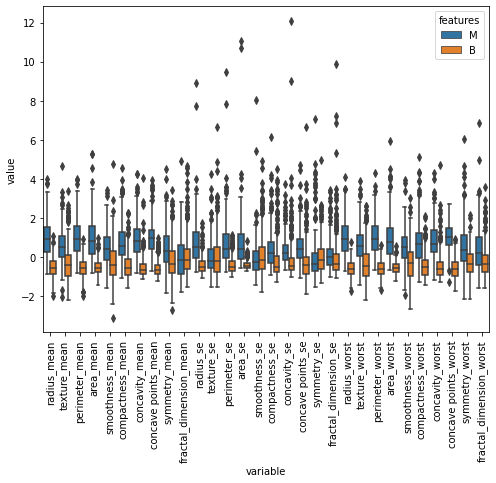

In [37]:
from src.visualization import visualize
visualize.melted_boxplot(X=X, y=y, labels=labels, labelname="features")

In [38]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(f"test:{accuracy_score(y_true, y_pred):.4f}")

test:0.5000


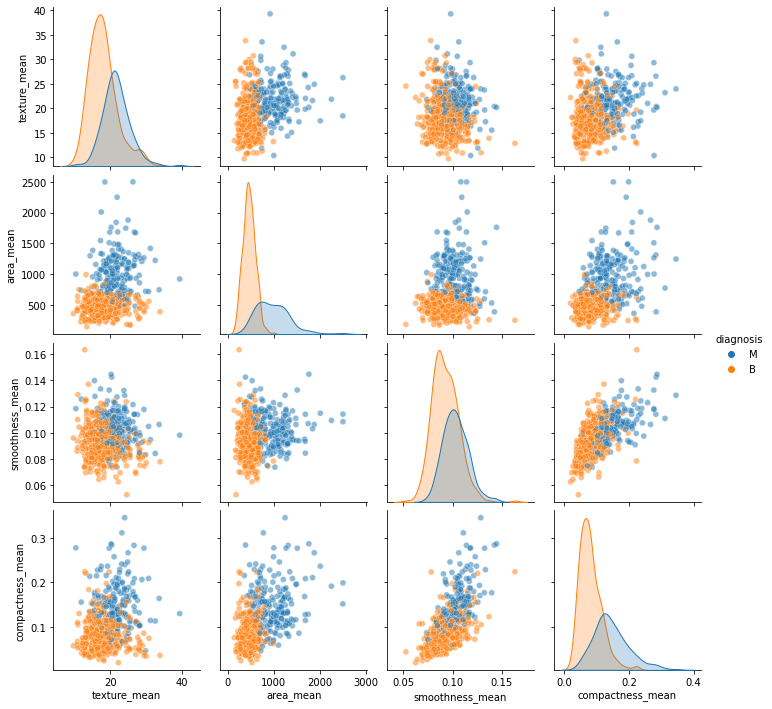

In [39]:
# do this just for a selection of features.
# it gives you a good idea of linear separability
sns.pairplot(df[['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']], 
             hue='diagnosis', plot_kws={'alpha' : 0.5});


Split into a train and test set. Use a `test_size` of 0.3. 

If you use `random_state` 4, you will get comparable results with the solutions.

In [40]:
from sklearn.model_selection  import train_test_split


X_train, X_test, y_train, y_test = # your code here


(398, 30)

Create a pipeline with a `StandardScaler` and a `SVC`

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Build pipeline
pipe = Pipeline(
    [
        # your code here

    ]

)

Create a parameter grid for the svm in the pipeline. Start with logarithmic steps for the values.

In [42]:
# Set parameter grid
param_grid = None

Create a GridSearchCV with the pipe. Fit on the trainset.

In [ ]:
gridsearch = None 

# Fit GridSearchCV
gridsearch.fit(X_train, y_train)

In [ ]:
print(gridsearch.best_score_)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

Visualize the results with the `gridsearch_heatmap` function.

In [ ]:
visualize.gridsearch_heatmap(gridsearch, param_grid, vmin = 0.9)

What do you see? How do you explain this? Now, zoom in on the parameters. Take the area with the best heatspot and increase the granularity.

Can you figure out how you can manually pick another value then the `best_score_`?
Hint: look at the `set_params` method on the pipe. Fit and score the pipe with manually parameters, without running a gridsearch.

 What would you want to do that? At what point in the process is this a smart move? 
 Based on what would you pick another value?

Can you figure out how to add another kernel ("sigmoid") to the pipe? Read the documentation
from sklearn on SVC to find out your options.

You should not change it in the pipe itself: the pipe should just have `SVC()`
as a model. But add the "sigmoid" kernel as an option via the `param_grid` dictionary.

In [ ]:
visualize.gridsearch_heatmap(gridsearch, param_grid)

In [ ]:
print(gridsearch.best_score_)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

Let's zoom in on the best parameter range:

In [60]:
model = [*pipe.named_steps][-1]
assert pipe.named_steps[model].kernel =='rbf' and gridsearch.best_estimator_.named_steps[model].kernel == 'sigmoid'

In [ ]:
visualize.gridsearch_heatmap(gridsearch, param_grid)

In [ ]:
print(gridsearch.best_score_)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

Can you figure out how to switch the SVC for a `RandomForestClassifier` in the pipe? Read the documentation from `sklearn`, and do a gridsearch on different numbers of `n_estimators`. Take a range you suspect to be interesting based on the documentation.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build pipeline
pipe = Pipeline(
    [
        # your code
    ]
)

param_grid = # your code

gridsearch = GridSearchCV(pipe, param_grid=param_grid, cv=3)

# Fit GridSearchCV
gridsearch.fit(X_train, y_train)

In [ ]:
print(gridsearch.best_score_)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

How does this compare to the SVC? Can you plot the result for the different values of `n_estimators`? How does this compare to the `SVC`? How certain are you of the results on onseen data, based on these results? Which one would you pick, just based on these results?